# Fair Value Modeling

## Abstract
In [(Dunis et al. 2005)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.568.7460&rep=rep1&type=pdf) the case is made that the crack spread exhibits asymmetry at the \\$5 dollar mark, with seemingly larger moves occurring on the upside of the long-term 'fair value' than on the downside.


The gasoline crack spread can be interpreted as the profit margin gained by processing crude oil into unleaded gasoline. It is simply the monetary difference between West Texas Intermediate crude oil and Unleaded Gasoline, both of which are traded on the New York Mercantile Exchange (NYMEX).

$$ S_{t} = GAS_t - WTI_t $$

$S_{t}$ is the price of the spread at time $t$ (in \\$ per barrel), $GAS_t$ is the price of unleaded gasoline at time $t$ (in \\$ per barrel), and $WTI_t$ is the price of West Texas Intermediate crude oil at time $t$ (in \\$ per
barrel).

## Non-linear cointegration

Cointegration was first introduced by [(Engle and Granger. 1987)](https://doi.org/10.2307/1913236). The technique is to test the null hypothesis that any combination of two series contains a unit root. If the null hypothesis is refuted and the conclusion is that a unit root does not exist, the combination of the two series is cointegrated. 

As explained in the previous section, the crack spread may exhibit larger moves in one direction than in the other, this is known as asymmetry. Since the traditional unit root test has only one parameter for the autoregressive estimate, it assumes upside and downside moves to be identical or symmetric.

Non-linear cointegration was first introduced by [(Enders and Granger. 1998)](https://doi.org/10.2307/1392506), who extended the unit root test by considering upside and downside moves separately, thus allowing for the possibility of asymmetric adjustment. 

Enders and Granger extend the Dickey-Fuller test to allow for the unit root hypothesis to be tested against an
alternative of asymmetric adjustment. Here, this is developed from its simplest form; consider the standard Dickey–Fuller test

$$ \Delta \mu_{t} = p \mu_{t-1} + \epsilon_t $$ 

where $\epsilon_t$ is a white noise process. The null hypothesis of $p=0$ is tested against the alternative of $p \neq 0 $. $p=0$ indicates that there is no unit root, and therefore $\mu_i$ is a stationary series. If the series $\mu_i$ are the residuals of a long-run cointegration relationship as indicated by Johansen, this
simply results in a test of the validity of the cointegrating vector (the residuals of the cointegration equation should form a stationary series).

The extension provided by Enders and Granger is to consider the upside and downside moves separately, thus allowing for the possibility of asymmetric adjustment. Following this approach;

$$ \Delta \mu_{t} = I_t p_1 \mu_{i-1} + (1 - I_t) p_2 \mu_{i-1} + \epsilon_t  $$

where $I_t$ is the zero-one ‘heaviside’ indicator function. The paper uses the following specification;

$$ I_t = \left \{ {{1, if \mu_{t-1} \geq 0} \over {0, if \mu_{t-1} < 0}} \right. $$

Enders and Granger refer to the model defined above as __threshold autoregressive (TAR)__. The null hypothesis of symmetric adjustment is $(H_0: p_1 = p_2)$, which can be tested using the standard F-test (in this case
the Wald test), with an additional requirement that both $p_1$ and $p_2$ do not equal zero. If $p_1 \neq p_2$, cointegration between the underlying assets is non-linear.

In [4]:
from IPython.display import Image

import statsmodels.api as sm
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from arbitragelab.cointegration_approach.johansen import JohansenPortfolio
from arbitragelab.ml_approach.tar import TAR

In [5]:
# Load Non Negative Crude and Gasoline futures data.
wti_contract_df = pd.read_csv('./data/NonNegative_CL_forward_roll.csv').set_index('Dates')
rbob_contract_df = pd.read_csv('./data/NonNegative_nRB_forward_roll.csv').set_index('Dates')

working_df = pd.concat([wti_contract_df, rbob_contract_df], axis=1)
working_df.index = pd.to_datetime(working_df.index) 
working_df.columns = ['wti', 'gasoline']

working_df.dropna(inplace=True)
working_df

,wti,gasoline
Dates,,
2006-01-03,1.034404,1.026552
2006-01-04,1.038991,1.048563
2006-01-05,1.028670,1.044253
2006-01-06,1.051933,1.060632
2006-01-09,1.040301,1.033046
...,...,...
2019-12-25,0.431366,1.056159
2019-12-26,0.435390,1.072488
2019-12-27,0.435672,1.068574


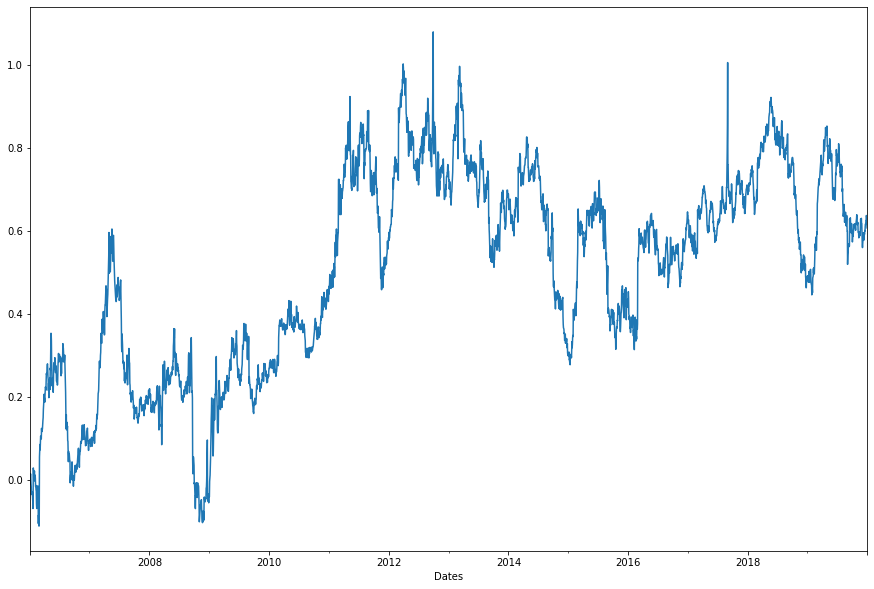

In [12]:
# Calculate naive spread between gasoline and wti.
sprd = (working_df['gasoline'] - working_df['wti'])

# Plot spread.
plt.figure(figsize=(15,10))
sprd.plot();

In [13]:
# The TAR model expects a Zero mean series.
demeaned_spread = (sprd - sprd.mean())

# Initialize and fit TAR model.
model = TAR(demeaned_spread, False)
tar_results = model.fit()
tar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              4.639
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                     0.00973
Time:                        08:28:38   Log-Likelihood:                          8981.4
No. Observations:                3650   AIC:                                 -1.796e+04
Df Residuals:                    3648   BIC:                                 -1.795e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
p_1           -0.0052      0.002     -2.467      0.014      -0.009      -0.001
p_2           -0.0033      0.002     -1.787      0.074      -0.007       0.000
==============================================================================
Omnibus:                     1202.783   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66006.364
Skew:                          -0.765   Prob(JB):                         0.00
Kurtosis:                      23.777   Cond. No.                         1.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotted Residuals of the TAR Model

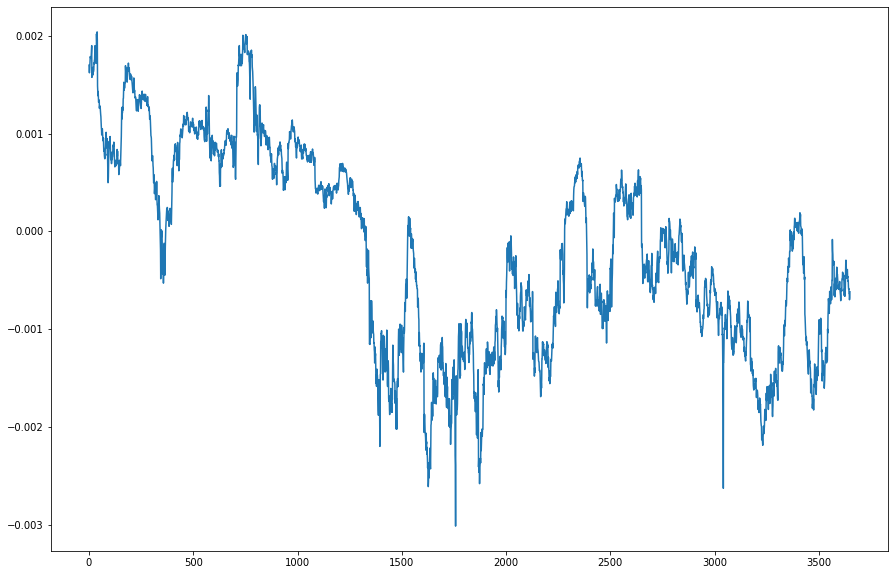

In [14]:
plt.figure(figsize=(15,10))
plt.plot(tar_results.fittedvalues.values);

# Results

The results from the original paper (Dunis et al. 2005) which uses the crack spread series from (1995 - 2003), finds statistical significant evidence of the presence of non linearity.  


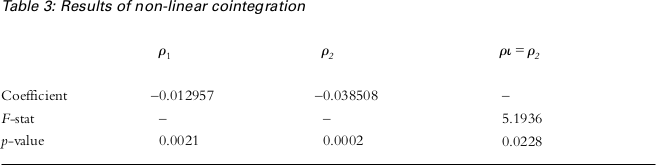

In [15]:
Image(filename='images/paper_results.png')

In our current time frame we are using (2005 - 2019) we fail to reject the null in the hypothesis of $p_1 = p_2$.

In [16]:
model.summary()

,p_1,p_2,p_1 = p_2
index,,,
Coefficient,-0.005238,-0.003322,NaN
F-stat,NaN,NaN,0.460965
p-value,0.013675,0.074081,0.497216


# Difference between the Linear and Non Linear Model Residuals

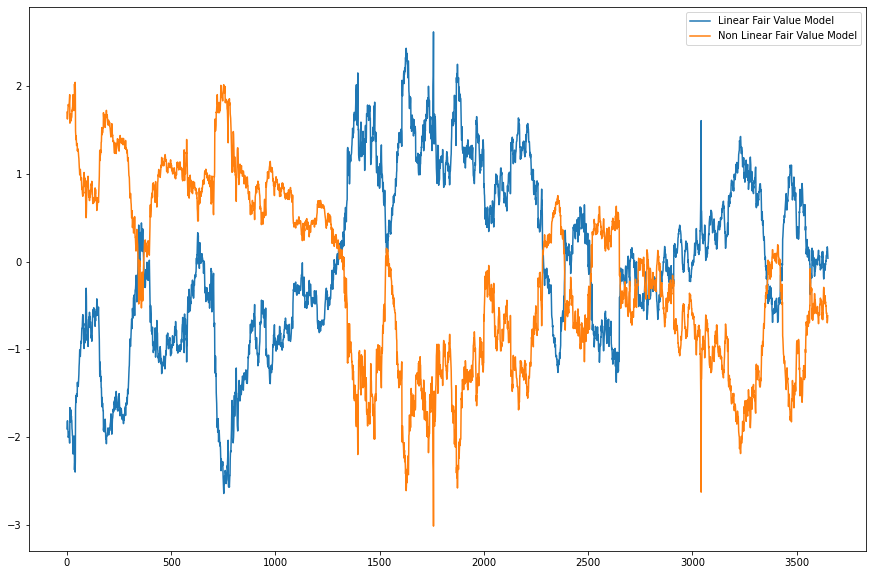

In [17]:
# Initialize the linear fair value model.
jp_df = JohansenPortfolio()
jp_df.fit(working_df[['gasoline', 'wti']])

jp_spread = jp_df.construct_mean_reverting_portfolio(working_df[['gasoline', 'wti']])

# Demean the linear fair value model spread.
demeaned_jp_spread = jp_spread-jp_spread.mean()

plt.figure(figsize=(15,10))

# Plot Johansen Cointegration residuals.
plt.plot(demeaned_jp_spread.values)

# The Tar Fitted Results are multiplied by 1000, to provide 
# parity in measurements between models.
plt.plot(tar_results.fittedvalues.values*1000)
plt.legend(["Linear Fair Value Model", "Non Linear Fair Value Model"])

In [15]:
pd.Series(data=tar_results.fittedvalues.values, index=working_df.index[1:]).to_csv('./data/tar_residual_gas_wti.csv')

# Conclusion

A major consideration to be taken into account when analyzing these results is that the future contracts data used in the paper went out of service a few months after the paper was released. The data that has been used in this notebook was the new contracts that started back then. 

The results clearly show that at least in the period observed the relationship between WTI and RBOB doesn't fit the Threshold Auto Regressive Model. This is evidenced by the results of the Wald test. However we can deduce, since $p_1$ is smaller in absolute terms than $p_2$, movements below fair value tend, on average, to be larger than movements above fair value. 

# References

* Dunis et al. (2005) 'Modelling and trading the gasoline crack spread: A non-linear story', Available at <https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.568.7460&rep=rep1&type=pdf>

* Engle, R. F. and Granger, C. W. J. (1987) 'Cointegration and Error Correction: Representation, Estimation and Testing', Available at https://doi.org/10.2307/1913236

* Enders, W. and Granger, C. (1998) 'Unit-root Tests and Asymmetric Adjustment with an Example Using the Term Structure of Interest Rates', Available at https://doi.org/10.2307/1392506
